# Importing Necessary Libraries

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#importing os to change working directory
import os
print(os.getcwd())

#changing current working directory
os.chdir('C:\\Users\\lenovo\\Assignment\\Datasets and Dictionary\\trip_records')
print(f'Current working directory changed to {os.getcwd()}')

C:\Users\lenovo\Assignment\github
Current working directory changed to C:\Users\lenovo\Assignment\Datasets and Dictionary\trip_records


# Loading the Cleaned Sampled Data

In [6]:
df = pd.read_parquet("cleaned_nyc_taxi_data.parquet")

In [7]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

# General EDA: Finding Patterns and Trends

## Temporal Analysis

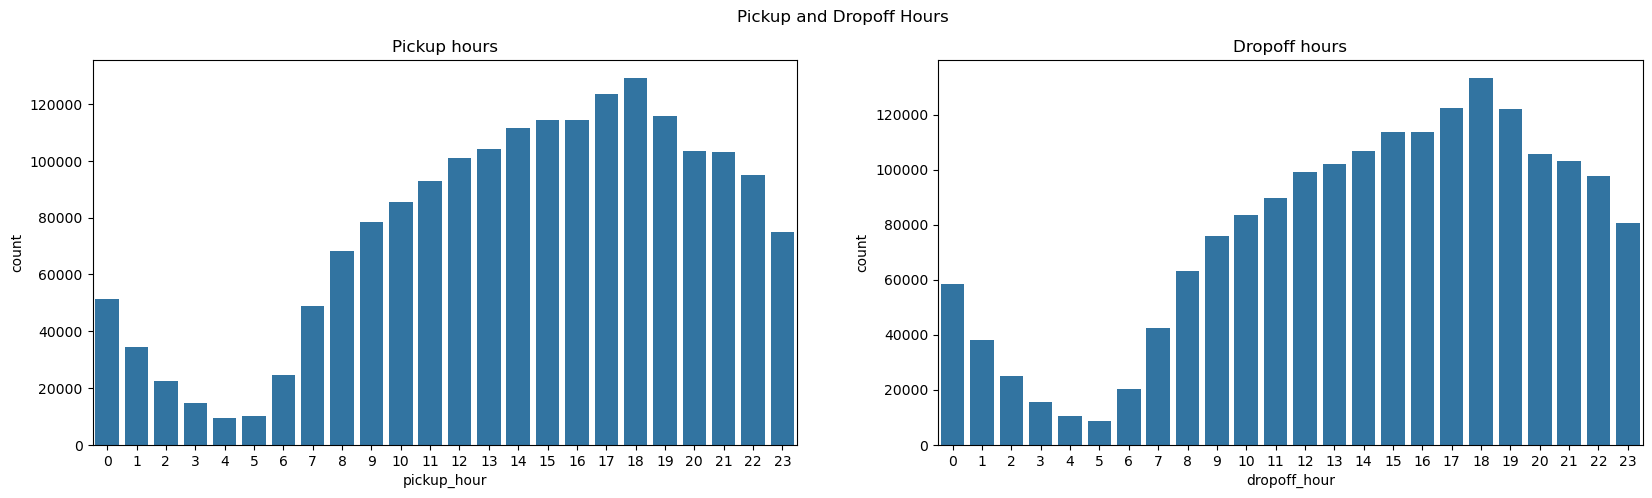

In [10]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.month_name()

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
figure.suptitle('Pickup and Dropoff Hours')
ax1.set_title('Pickup hours')
ax=sns.countplot(x="pickup_hour",data= df,ax=ax1)
ax2.set_title('Dropoff hours')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax2)
plt.show()

## Analysis : The busiest hours are 5:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

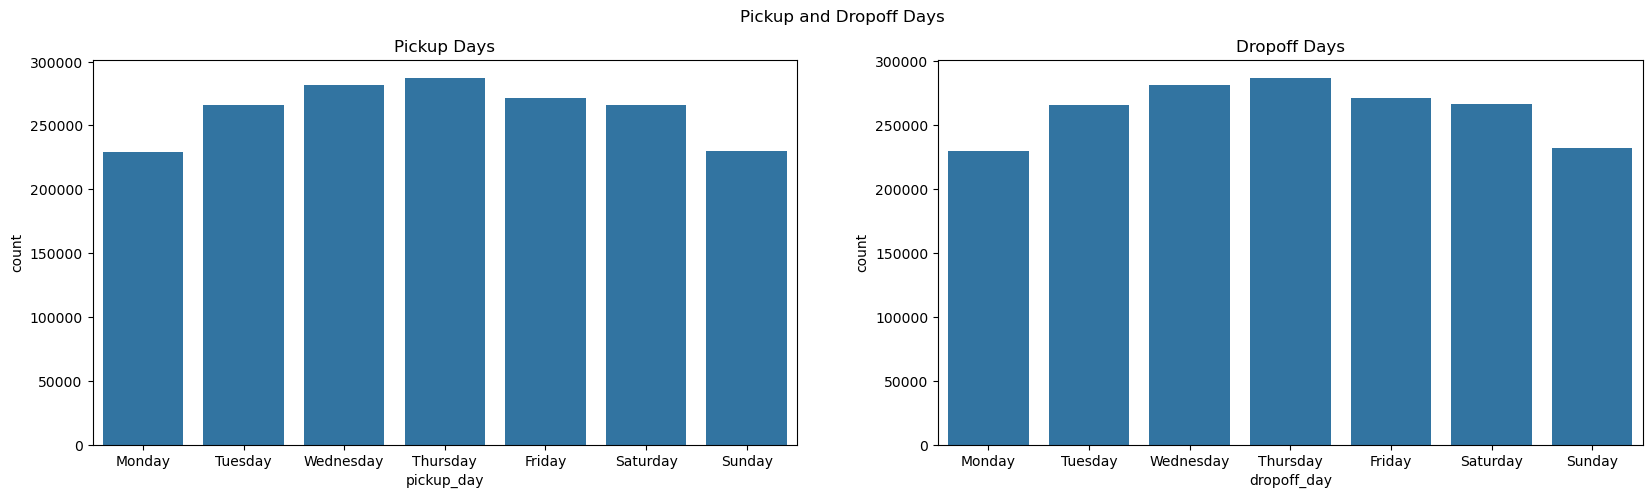

In [11]:
# Find and show the daily trends in taxi pickups (days of the week)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
figure.suptitle('Pickup and Dropoff Days')

ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1, order= weekday_order)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2, order= weekday_order)

plt.show()

## Analysis : The busiest days are Monday to Friday and that makes sense as this is the time when people go to their offices.

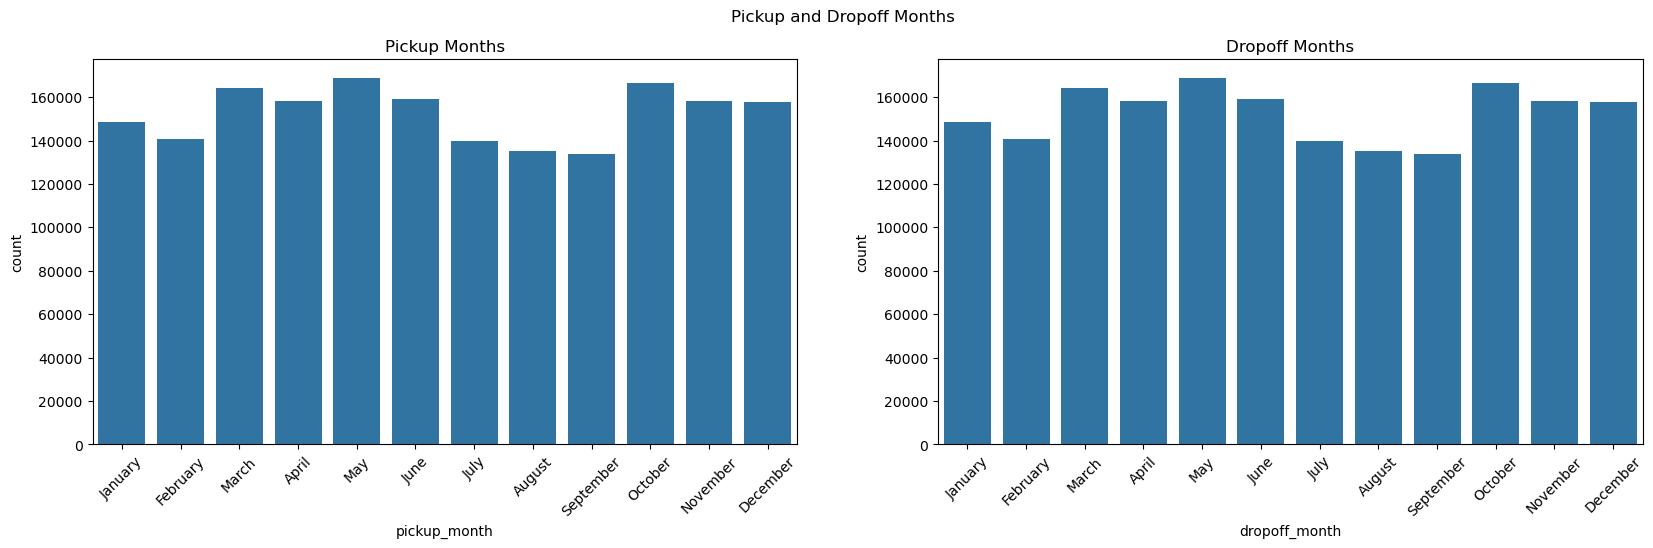

In [12]:
# Show the monthly trends in pickups

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
figure.suptitle('Pickup and Dropoff Months')

ax1.set_title('Pickup Months')
ax=sns.countplot(x="pickup_month",data=df,ax=ax1, order= month_order)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2.set_title('Dropoff Months')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax2, order= month_order)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.show()
## Analysis : The busiest months are January to March and that makes sense as this is the time when people go to their offices.


## Financial Analysis

In [14]:
df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()

,fare_amount,tip_amount,total_amount,trip_distance
count,1.831196e+06,1.831196e+06,1.831196e+06,1.831196e+06
mean,1.970696e+01,3.569813e+00,2.945569e+01,3.440574e+00
std,1.791917e+01,4.013342e+00,2.256308e+01,4.508551e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.300000e+00,1.000000e+00,1.650000e+01,1.050000e+00
50%,1.350000e+01,2.860000e+00,2.175000e+01,1.780000e+00
75%,2.190000e+01,4.450000e+00,3.140000e+01,3.370000e+00
max,3.000000e+02,1.000000e+02,4.236300e+02,1.873500e+02


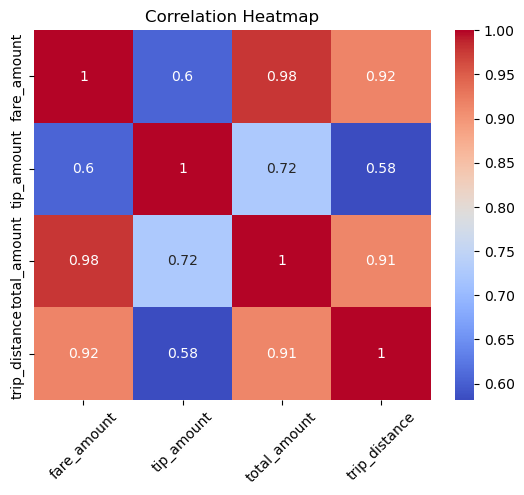

In [15]:
# Analyse the above parameters

df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()
# Analysis : There are zero values in fare_amount, tip_amount, total_amount, and trip_distance.


#Analysing the above parameters by their correlation:
df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].corr()

# Analysis : There is a strong positive correlation between fare_amount and total_amount, which makes sense as total_amount includes fare_amount.
# There is a positive correlation between tip_amount and total_amount, which makes sense as tip_amount is included in total_amount.

#plotting the correlation:
sns.heatmap(df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Create a df with non zero entries for the selected parameters.
sampled_taxi_records_filtered = df[(df['fare_amount'] != 0) & (df['tip_amount'] != 0) & (df['total_amount'] != 0)]
sampled_taxi_records_filtered.shape

(1421039, 24)

In [17]:
sampled_taxi_records_filtered.groupby('pickup_month')['total_amount'].sum().sort_values(ascending=False)

pickup_month
October      4086156.13
May          4047197.11
November     3837018.42
March        3802052.76
June         3792309.85
December     3741886.47
April        3684552.85
January      3321541.66
September    3279772.99
July         3211230.90
February     3155203.53
August       3108533.91
Name: total_amount, dtype: float64

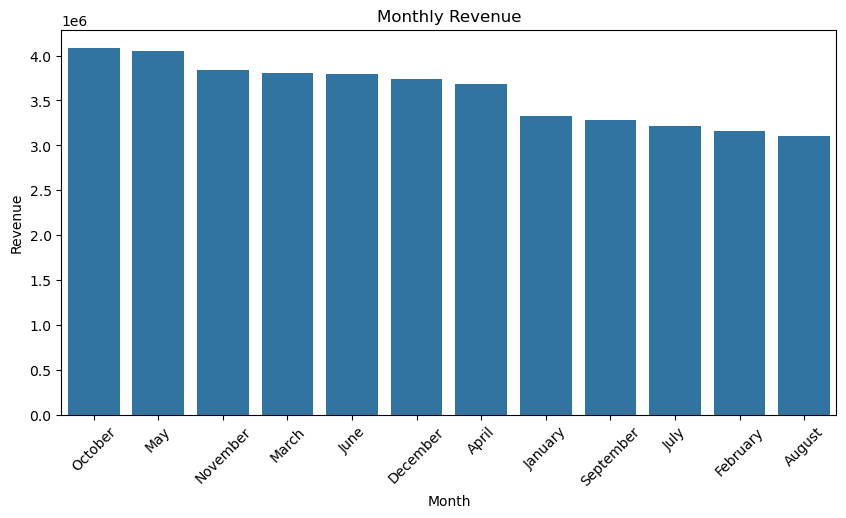

In [18]:
# Group data by month and analyse monthly revenue

#subsetting mothly data 
monthly_sampled_taxi_records_filtered = sampled_taxi_records_filtered.groupby('pickup_month')['total_amount'].sum().sort_values(ascending=False)

#plotting a bar plot:
plt.figure(figsize=(10, 5))
sns.barplot( data = monthly_sampled_taxi_records_filtered)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()



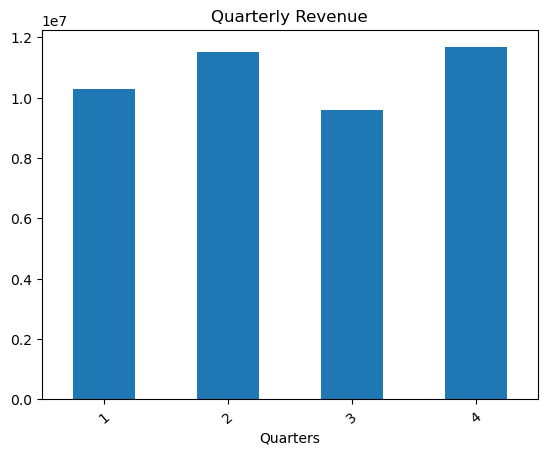

In [19]:
# Calculate proportion of each quarter
sampled_taxi_records_filtered['quarter'] = sampled_taxi_records_filtered['tpep_pickup_datetime'].dt.quarter
sampled_taxi_records_filtered.groupby('quarter')['total_amount'].sum().plot(kind='bar')
plt.title('Quarterly Revenue')
plt.xlabel('Quarters')
plt.xticks(rotation=40)
plt.ylabel('')
plt.show()


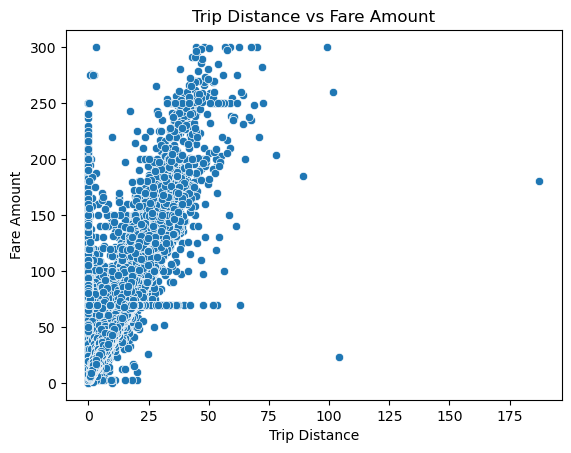

In [20]:
# Show how trip fare is affected by distance

sampled_taxi_records_filtered['trip_distance'].corr(sampled_taxi_records_filtered['fare_amount'])
sns.scatterplot(x='trip_distance', y='fare_amount', data=sampled_taxi_records_filtered)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

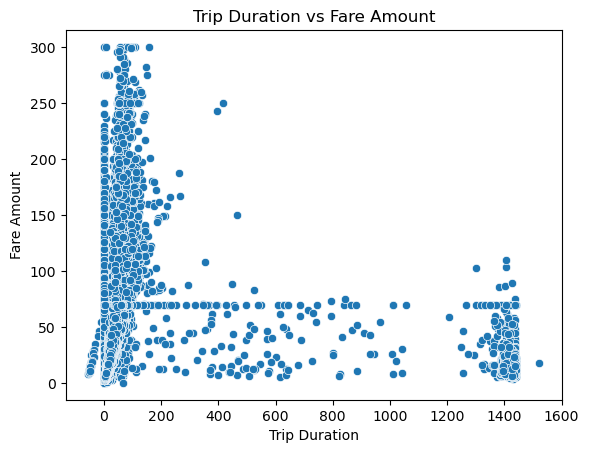

In [21]:
# Show relationship between fare and trip duration
sampled_taxi_records_filtered['trip_duration'] = (sampled_taxi_records_filtered['tpep_dropoff_datetime'] - sampled_taxi_records_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60
sampled_taxi_records_filtered['trip_duration'].corr(sampled_taxi_records_filtered['fare_amount'])
sns.scatterplot(x='trip_duration', y='fare_amount', data=sampled_taxi_records_filtered)
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.show()


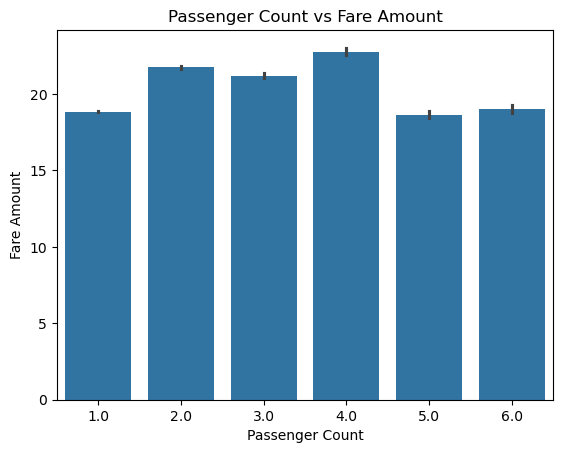

In [22]:
# Show relationship between fare and number of passengers
sampled_taxi_records_filtered['passenger_count'].corr(sampled_taxi_records_filtered['fare_amount'])
sns.barplot(x='passenger_count', y='fare_amount', data=sampled_taxi_records_filtered)
plt.title('Passenger Count vs Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()


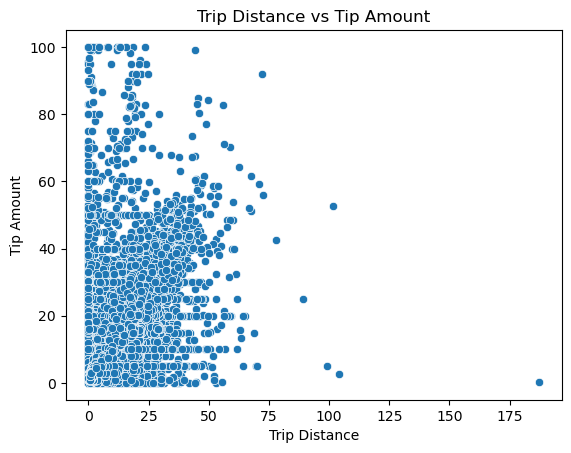

In [23]:
# Show relationship between tip and trip distance
sampled_taxi_records_filtered['tip_amount'].corr(sampled_taxi_records_filtered['trip_distance'])
sns.scatterplot(x='trip_distance', y='tip_amount', data=sampled_taxi_records_filtered)
plt.title('Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()


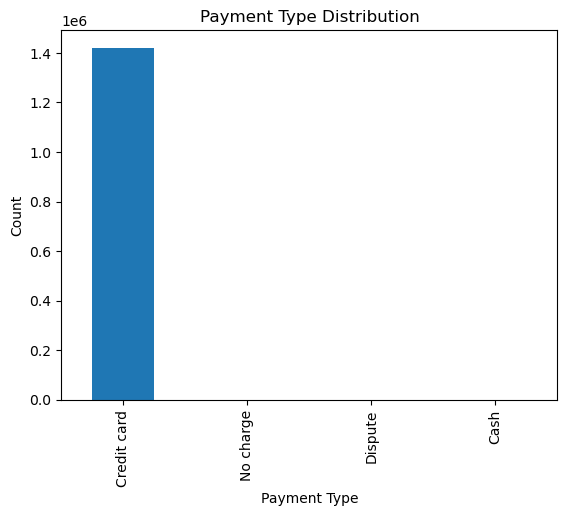

In [24]:
# Analyse the distribution of different payment types (payment_type).

# sampled_taxi_records_filtered['payment_type'].unique()

def payment_type_mapping(payment_type):
    if payment_type == 1:
        return 'Credit card'
    elif payment_type == 2:
        return 'Cash'
    elif payment_type == 3:
        return 'No charge'
    elif payment_type == 4:
        return 'Dispute'
    elif payment_type == 5:
        return 'Unknown'
    else:
        return 'Unknown'

#applying the function:
sampled_taxi_records_filtered['payment_type'] = sampled_taxi_records_filtered['payment_type'].apply(payment_type_mapping)

# plotting a bar plot
sampled_taxi_records_filtered['payment_type'].value_counts().plot(kind='bar')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()



## Geographical Analysis

In [26]:

# Read the shapefile using geopandas
zones = gpd.read_file('C:\\Users\\lenovo\\Assignment\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp') # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


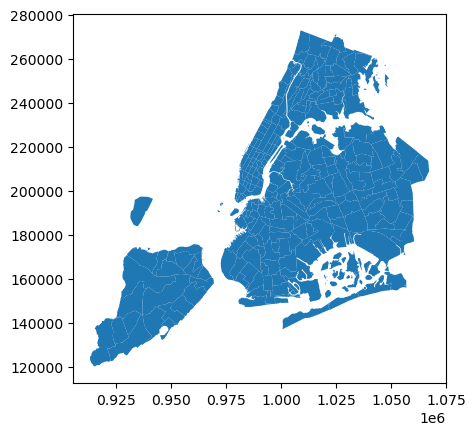

In [27]:
#loading geopspatial data
print(zones.info())

zones.plot()
plt.show()

In [28]:
# Merge zones and trip records using locationID and PULocationID

sampled_taxi_records_filtered = sampled_taxi_records_filtered.merge(zones, left_on='PULocationID', right_on='LocationID', how= 'left')
sampled_taxi_records_filtered.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,dropoff_month,quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,Credit card,7.9,...,January,1,5.083333,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
1,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,246,37,Credit card,34.5,...,January,1,33.616667,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."
2,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2.0,1.59,1.0,79,164,Credit card,11.4,...,January,1,10.516667,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
3,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1.0,3.16,1.0,79,256,Credit card,19.1,...,January,1,15.883333,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
4,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1.0,7.64,1.0,132,95,Credit card,31.7,...,January,1,17.133333,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."


In [29]:
# Group data by location and calculate the number of trips

pickup_location = sampled_taxi_records_filtered.groupby(['PULocationID', 'zone']).size().reset_index(name='number_of_trips')
pickup_location.sort_values(by='number_of_trips', ascending=False, inplace=True)
pickup_location.head(10)

,PULocationID,zone,number_of_trips
208,237,Upper East Side South,70050
140,161,Midtown Center,68002
114,132,JFK Airport,64131
207,236,Upper East Side North,63887
141,162,Midtown East,52876
120,138,LaGuardia Airport,51793
123,142,Lincoln Square East,49092
163,186,Penn Station/Madison Sq West,48791
201,230,Times Sq/Theatre District,44626
149,170,Murray Hill,43352


In [30]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(pickup_location, left_on='zone', right_on='zone', how='left')
zones.sort_values(by='number_of_trips', ascending=False)
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,number_of_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,127.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN,NaN
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1421.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,NaN


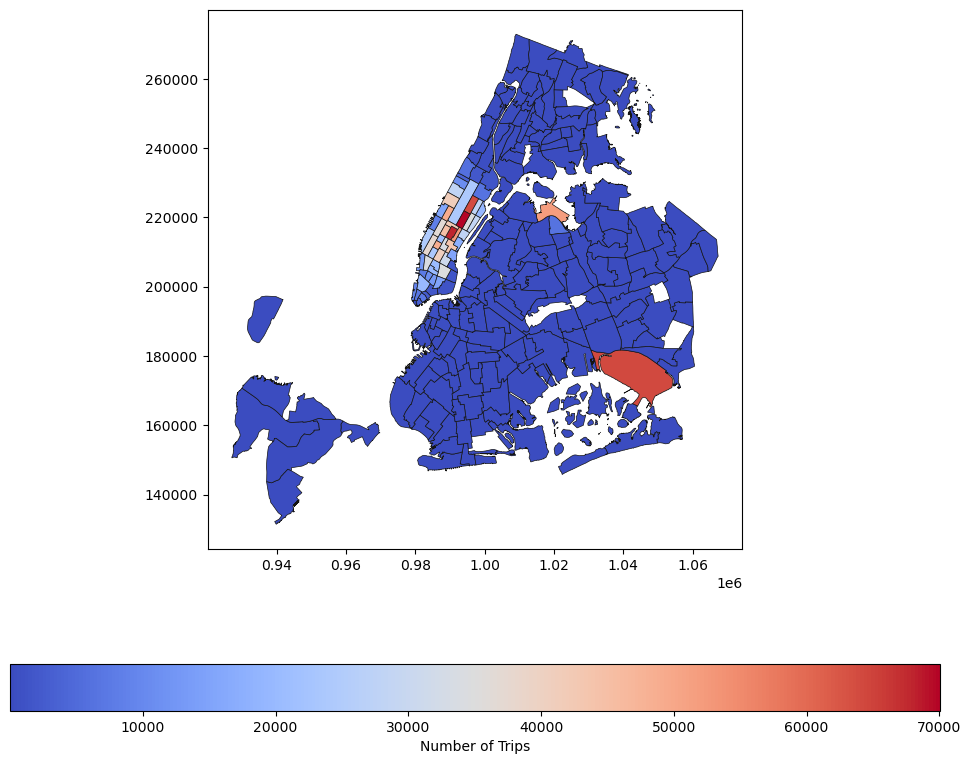

In [31]:
#plotting a map to visualize zone wise trips
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='number_of_trips', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"}, cmap= 'coolwarm',  edgecolor='0.08', linewidth=0.5)
plt.show()


In [32]:
#displaying the zones DF sorted by the number of trips
zones.sort_values(by='number_of_trips', ascending=False, inplace=True)
zones.head(10)


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,number_of_trips
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,70050.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,68002.0
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,64131.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,63887.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,52876.0
137,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",138.0,51793.0
141,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",142.0,49092.0
185,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21...",186.0,48791.0
229,230,0.031028,0.000056,Times Sq/Theatre District,230,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21...",230.0,44626.0
169,170,0.045769,0.000074,Murray Hill,170,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21...",170.0,43352.0


We completed the temporal, financial and geographical analysis on the trip records.


 **Summary of Findings from General Analysis**

**Trends in Taxi Activity**  
- **Peak Hours:**  
  - Taxi pickups and drop-offs peak during **evening rush hours (5:00 PM - 7:00 PM)**, coinciding with office commuters returning home.  
- **Weekday vs. Weekend Patterns:**  
  - **Wednesdays and Thursdays** record the highest taxi activity, likely due to mid-week work commutes.  
  - **Weekends show slightly lower demand** as fewer people commute for work.  
- **Seasonal Variations:**  
  - **Summer months (May–June)** and **Q4 (October–December)** experience higher taxi activity.  
  - Increased demand is likely driven by **holidays, festivals, and tourism surges** in these periods.  

**Revenue Collection Trends**  
- **Quarterly Revenue Insights:**  
  - The highest revenue occurs in **Q2 (May–July) and Q4 (October–December)**.  
  - **Q4 is the peak revenue period**, aligning with the festive season and increased travel demand.  

**Financial Analysis**  
- **Fare vs. Trip Distance:**  
  - A **strong positive correlation** exists between trip distance and fare—**longer trips yield higher fares**.  
- **Fare vs. Trip Duration:**  
  - A **moderate correlation** exists between trip duration and fare, but pricing is more dependent on distance.  
- **Fare vs. Passenger Count:**  
  - **Trips with more than one passenger tend to have higher fares**, with **4-passenger trips generating the most revenue**.  
- **Tips vs. Trip Distance:**  
  - **Longer trips generally receive higher tips**, likely due to increased passenger satisfaction and service duration.  

**Busiest Pickup Zones**  
- **Top high-traffic pickup locations:**  
  -  **Upper East Side South**  
  -  **Midtown Center**  
  -  **Upper East Side North**  
  -  **JFK Airport**  
  -  **Midtown East**  
- These locations serve as **key business hubs, transit points, and high-demand areas** for daily commuters and travelers.  


#  Detailed EDA: Insights and Strategies

In [35]:
## Analysisng Opreational Efficiency 

In [36]:
# Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.
# Find routes which have the slowest speeds at different times of the day

#preparing the data for further analysis:

#dropping the columns that are not needed:
sampled_taxi_records_filtered.drop(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'borough', 'geometry'], axis=1, inplace=True)

#renaming columns for better understanding:
sampled_taxi_records_filtered.rename(columns={'zone': 'pickup_zone'}, inplace=True)

#dropping the locationID:
sampled_taxi_records_filtered.drop(['LocationID'], axis=1, inplace=True)

#merging to get the drop off zone:
sampled_taxi_records_filtered = sampled_taxi_records_filtered.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how= 'left')
sampled_taxi_records_filtered.rename(columns={'zone': 'dropoff_zone'}, inplace=True)
sampled_taxi_records_filtered.drop(['LocationID'], axis=1, inplace=True)

#sampling the records with non zero trip duration:
sampled_taxi_records_filtered = sampled_taxi_records_filtered[sampled_taxi_records_filtered['trip_duration'] > 0]

# Ensure pickup and drop-off locations are different
sampled_taxi_records_filtered = sampled_taxi_records_filtered[sampled_taxi_records_filtered['PULocationID'] != sampled_taxi_records_filtered['DOLocationID']]


#Calculating the speed of each trip:
sampled_taxi_records_filtered['speed'] = sampled_taxi_records_filtered['trip_distance'] / (sampled_taxi_records_filtered['trip_duration'] / 3600)

#Group by the pickup zone, drop zone and pickup hour to find the slowest speed:
slow_routes = sampled_taxi_records_filtered.groupby(['pickup_zone', 'dropoff_zone', 'pickup_hour', 'PULocationID', 'DOLocationID'])['speed'].mean().reset_index()
slow_routes.sort_values(by='speed', ascending=True, inplace=True)




In [37]:
#Top 10 slowest routes:
slow_routes.head(10)

,pickup_zone,dropoff_zone,pickup_hour,PULocationID,DOLocationID,speed
69537,Queensbridge/Ravenswood,Astoria,11,193,7,0.0
69536,Queensbridge/Ravenswood,Astoria,10,193,7,0.0
52383,Lower East Side,Newark Airport,10,148,1,0.0
66839,Newark Airport,East Village,9,1,79,0.0
5881,Central Park,Midtown North,2,43,163,0.0
11351,Downtown Brooklyn/MetroTech,Forest Hills,20,65,95,0.0
6977,Chinatown,Morningside Heights,0,45,166,0.0
67301,Penn Station/Madison Sq West,Brooklyn Heights,8,186,33,0.0
989,Baisley Park,Sutton Place/Turtle Bay North,22,10,229,0.0
755,Astoria,Queensbridge/Ravenswood,15,7,193,0.0


The Importance of Identifying High-Traffic, High-Demand Routes
Understanding which routes experience the highest demand and traffic congestion offers numerous benefits for taxi companies, passengers, and city planners. Here’s how this insight can drive efficiency and improve service quality:

Optimized Fleet Allocation: By pinpointing high-demand routes, taxi companies can strategically deploy more vehicles during peak hours, ensuring sufficient availability and reducing service gaps.
Reduced Wait Times & Improved Customer Satisfaction: A well-balanced fleet distribution means passengers experience shorter wait times, leading to a smoother and more reliable ride-hailing experience.
Dynamic Pricing for Revenue Maximization: Demand-based fare adjustments can help optimize revenue during rush hours, while also encouraging rides during off-peak times to balance demand.
Efficient Route Planning & Fuel Savings: Insights into traffic patterns enable better route optimization, helping drivers avoid congestion, minimize idle time, and reduce fuel consumption.
Enhanced Service Reliability: Ensuring that taxis are consistently available on popular routes strengthens customer trust and encourages repeat usage.
Traffic Flow & Infrastructure Improvements: Identifying bottlenecks and frequently congested areas allows for targeted interventions, such as adjusting traffic signals, recommending alternative routes, or collaborating with city planners for long-term solutions.
By leveraging data on high-traffic routes, taxi services can enhance operational efficiency, boost profitability, and contribute to a more seamless urban mobility experience.

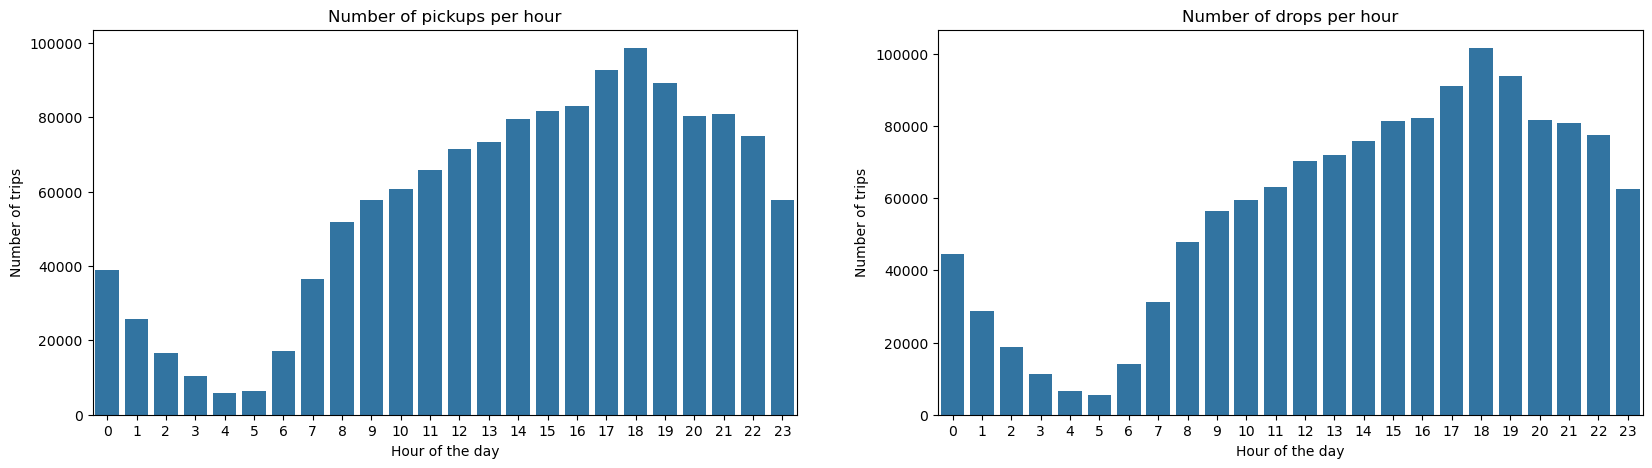

In [39]:
# Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.
# Visualise the number of trips per hour and find the busiest hour

figure,(ax1, ax2) = plt.subplots(ncols= 2, figsize = (20, 5))
ax1.set_title('Number of pickups per hour')
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Number of trips')
ax= sns.countplot(x="pickup_hour",data=sampled_taxi_records_filtered,ax=ax1)

ax2.set_title('Number of drops per hour')
ax2.set_xlabel('Hour of the day')
ax2.set_ylabel('Number of trips')
ax= sns.countplot(x="dropoff_hour",data=sampled_taxi_records_filtered,ax=ax2)
plt.show()

# From the plot, the busiest hours are 5:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

In [40]:
# Find the actual number of trips in the five busiest hours
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

#calculate the hourly trips:
hourly_trips = sampled_taxi_records_filtered['pickup_hour'].value_counts().sort_index()

#scaling up to find the  actual hourly trips:
upscaled_hourly_trips = hourly_trips * sample_fraction


#Actual number of trips in top 5 busiest hours:
upscaled_hourly_trips.sort_values(ascending=False).head(5).reset_index(name='number_of_trips')



,pickup_hour,number_of_trips
0,18,4932.70
1,17,4643.60
2,19,4457.90
3,16,4151.85
4,15,4091.65


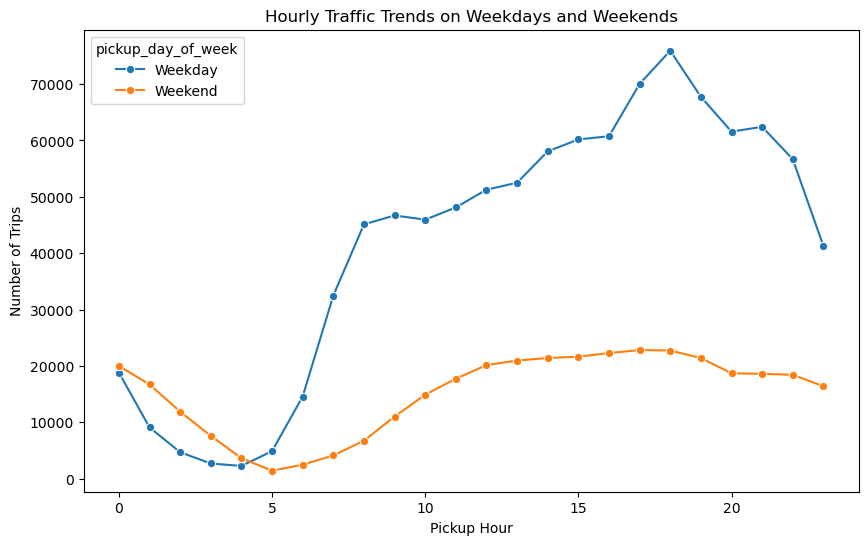

In [41]:
# Compare hourly traffic pattern on weekdays. Also compare for weekend.
# Compare traffic trends for the week days and weekends

#calculating the day of week:

sampled_taxi_records_filtered['pickup_day_of_week'] = sampled_taxi_records_filtered['tpep_pickup_datetime'].dt.day_name()

#Calculating trips over weekdays and weekends per hour:

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

weekday_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['pickup_day_of_week'].isin(weekdays)]
weekend_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['pickup_day_of_week'].isin(weekends)]


# Count trips per pickup hour
weekday_trips_df = weekday_trips.groupby('pickup_hour').size().reset_index(name='Number_of_trips')
weekday_trips_df['pickup_day_of_week'] = 'Weekday'

weekend_trips_df = weekend_trips.groupby('pickup_hour').size().reset_index(name='Number_of_trips')
weekend_trips_df['pickup_day_of_week'] = 'Weekend'


#merging the dataframes:
weekly_trips = pd.concat([weekday_trips_df, weekend_trips_df])


#Analysing using line plot:
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='Number_of_trips', hue='pickup_day_of_week', data=weekly_trips, marker='o', linewidth=1.5, ci=None)
plt.title('Hourly Traffic Trends on Weekdays and Weekends')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.show()

**Insights from the Traffic Pattern Chart:**
Weekday vs. Weekend Trends:

Weekdays (Blue Line) → Have significantly more trips than weekends, especially during commuting hours.
Weekends (Orange Line) → Show a flatter curve, meaning demand is more evenly spread across the day with fewer extreme peaks.
Peak Hours Analysis:

Morning Peak (6 AM - 10 AM) → Steep increase in weekday trips, likely due to office commutes.
Evening Peak (4 PM - 8 PM) → Another sharp rise, aligning with people returning home from work.
Weekend Peaks (10 AM - 4 PM) → More stable, indicating leisure trips rather than work-related commutes.
Quiet Hours:

Late Night to Early Morning (Midnight - 5 AM) → Low traffic on both weekdays and weekends.
Weekends are relatively stable without sharp peaks, suggesting more leisure-based rides.

**Finding Busiest and Quite Hours Aids in following:**

For Taxi Drivers & Ride-Sharing Services:
Helps optimize work shifts (work during peak hours for higher earnings).
Predicts high-demand zones and allocates more taxis in peak areas.

For City Planning & Traffic Management:
Helps in reducing congestion by adjusting traffic signals or planning alternate routes.
Ensures better public transport scheduling (more buses/trains during peak hours).

For Businesses (Restaurants, Malls, etc.):
Understanding when people travel most helps optimize opening hours and promotions.
Delivery services can plan operations to avoid high-traffic times.


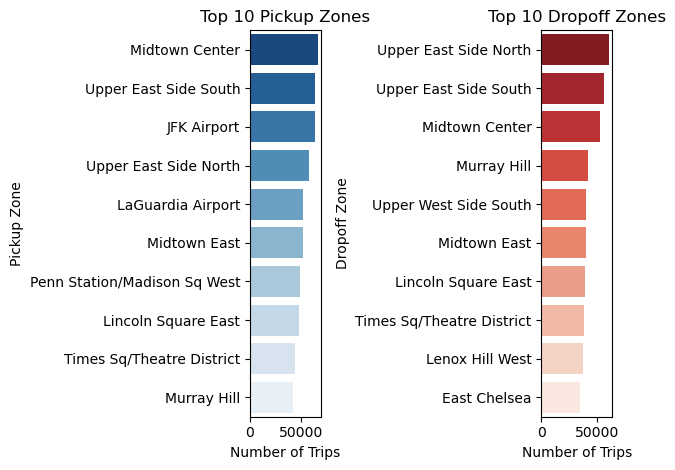

In [43]:
# Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.
# Find top 10 pickup and dropoff zones

#finding top 10 pickup zones:
top_pickupzones = sampled_taxi_records_filtered.groupby('pickup_zone')['pickup_zone'].count().reset_index(name='number_of_trips')
top10_pickupzones = top_pickupzones.sort_values(by='number_of_trips', ascending=False).head(10)


#finding top 10 dropoff zones:
top_dropoffzones = sampled_taxi_records_filtered.groupby('dropoff_zone')['dropoff_zone'].count().reset_index(name='number_of_trips')
top10_dropoffzones = top_dropoffzones.sort_values(by='number_of_trips', ascending=False).head(10)


# Plot for Pickup Zones
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.barplot(y=top10_pickupzones['pickup_zone'], x=top10_pickupzones['number_of_trips'], palette='Blues_r')
plt.title("Top 10 Pickup Zones")
plt.xlabel("Number of Trips")
plt.ylabel("Pickup Zone")

# Plot for Dropoff Zones
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.barplot(y=top10_dropoffzones['dropoff_zone'], x=top10_dropoffzones['number_of_trips'], palette='Reds_r')
plt.title("Top 10 Dropoff Zones")
plt.xlabel("Number of Trips")
plt.ylabel("Dropoff Zone")

plt.tight_layout()
plt.show()


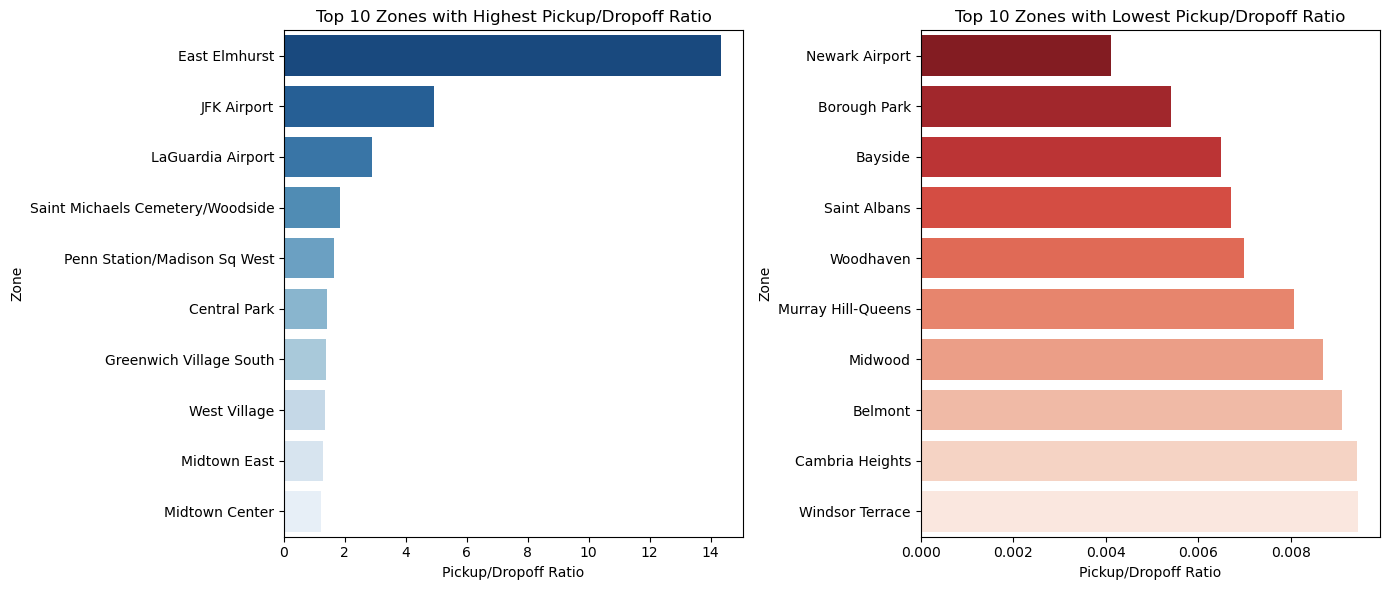

In [44]:
# Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_trip_counts = sampled_taxi_records_filtered['pickup_zone'].value_counts().reset_index()
pickup_trip_counts.columns = ['zone', 'pickup_trip_counts']


dropoff_trip_counts = sampled_taxi_records_filtered['dropoff_zone'].value_counts().reset_index()
dropoff_trip_counts.columns = ['zone', 'dropoff_trip_counts']

zone_trip_counts = pd.merge(pickup_trip_counts, dropoff_trip_counts, on='zone', how='outer').fillna(0)

zone_trip_counts = zone_trip_counts.astype({'pickup_trip_counts': 'int', 'dropoff_trip_counts': 'int'})
zone_trip_counts['pickup_dropoff_ratio'] = zone_trip_counts['pickup_trip_counts'] / zone_trip_counts['dropoff_trip_counts'].replace(0, np.nan)


# Drop inf/nan values
zone_trip_counts = zone_trip_counts.replace(np.inf, np.nan).dropna()


highest_pickup_dropoff_ratio = zone_trip_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
lowest_pickup_dropoff_ratio = zone_trip_counts[zone_trip_counts['pickup_dropoff_ratio']> 0].sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)


#  Visualization
plt.figure(figsize=(14, 6))

# Highest pickup/dropoff ratio
plt.subplot(1, 2, 1)
sns.barplot(y=highest_pickup_dropoff_ratio['zone'], x=highest_pickup_dropoff_ratio['pickup_dropoff_ratio'], palette='Blues_r')
plt.title("Top 10 Zones with Highest Pickup/Dropoff Ratio")
plt.xlabel("Pickup/Dropoff Ratio")
plt.ylabel("Zone")

# Lowest pickup/dropoff ratio
plt.subplot(1, 2, 2)
sns.barplot(y=lowest_pickup_dropoff_ratio['zone'], x=lowest_pickup_dropoff_ratio['pickup_dropoff_ratio'], palette='Reds_r')
plt.title("Top 10 Zones with Lowest Pickup/Dropoff Ratio")
plt.xlabel("Pickup/Dropoff Ratio")
plt.ylabel("Zone")

plt.tight_layout()
plt.show()


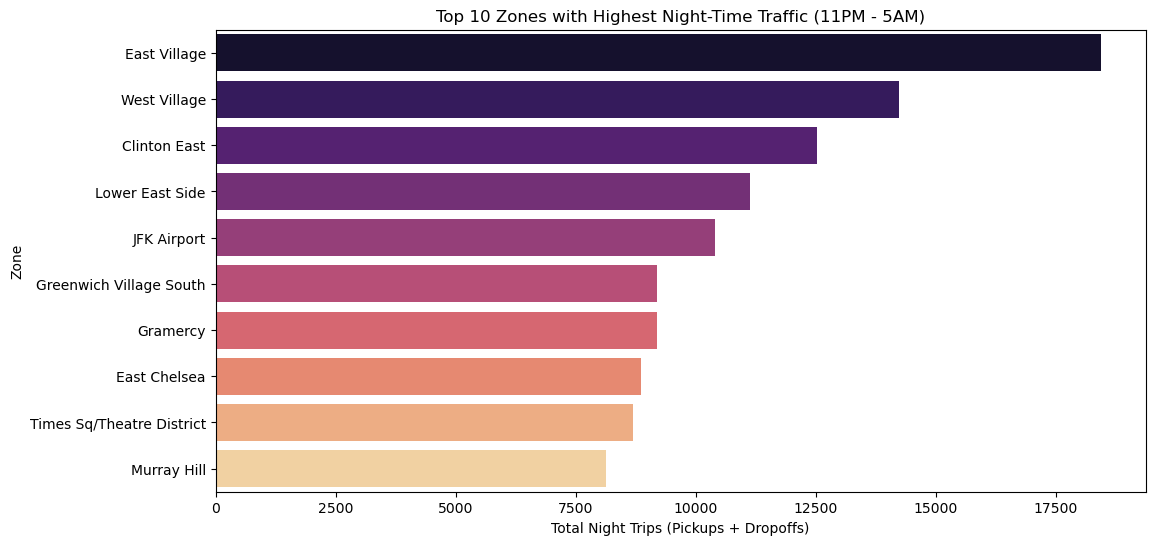

In [45]:
# Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Extract pickup hour from datetime column
sampled_taxi_records_filtered['pickup_hour'] = sampled_taxi_records_filtered['tpep_pickup_datetime'].dt.hour

# Define night hours (11 PM - 5 AM)
night_hours = list(range(23, 24)) + list(range(0, 6))

# Filter for trips occurring during night hours
night_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['pickup_hour'].isin(night_hours)]

# Count pickups and drop-offs per zone during night hours
night_pickup_counts = night_trips['pickup_zone'].value_counts().reset_index()
night_pickup_counts.columns = ['zone', 'pickup_counts']

night_dropoff_counts = night_trips['dropoff_zone'].value_counts().reset_index()
night_dropoff_counts.columns = ['zone', 'dropoff_counts']

# Merge pickup and dropoff counts
night_zone_traffic = pd.merge(night_pickup_counts, night_dropoff_counts, on='zone', how='outer').fillna(0)

# Convert to integers
night_zone_traffic = night_zone_traffic.astype({'pickup_counts': 'int', 'dropoff_counts': 'int'})

# Find top zones with highest night traffic (pickups + dropoffs)
night_zone_traffic['total_night_trips'] = night_zone_traffic['pickup_counts'] + night_zone_traffic['dropoff_counts']
top_night_zones = night_zone_traffic.sort_values(by='total_night_trips', ascending=False).head(10)

# Visualization 
plt.figure(figsize=(12, 6))
sns.barplot(y=top_night_zones['zone'], x=top_night_zones['total_night_trips'], palette='magma')
plt.title("Top 10 Zones with Highest Night-Time Traffic (11PM - 5AM)")
plt.xlabel("Total Night Trips (Pickups + Dropoffs)")
plt.ylabel("Zone")
plt.show()

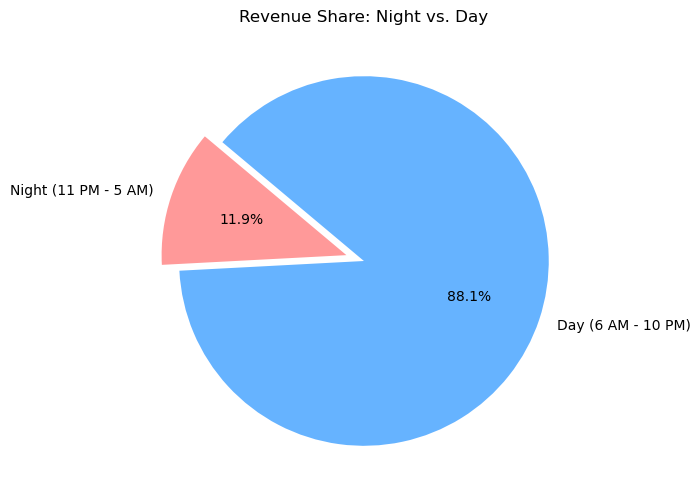

In [46]:
# Find the revenue share for nighttime and daytime hours.
# Filter for night hours (11 PM to 5 AM)

import pandas as pd
import matplotlib.pyplot as plt

# Define night hours (11 PM - 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter day and night trips
day_trips = sampled_taxi_records_filtered[~sampled_taxi_records_filtered['pickup_hour'].isin(night_hours)]
night_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['pickup_hour'].isin(night_hours)]

# Calculate revenue for night and day trips
night_revenue = night_trips['total_amount'].sum()
day_revenue = day_trips['total_amount'].sum()

# Creating a dataframe for visualization
revenue_df = pd.DataFrame({
    "Time Period": ["Night (11 PM - 5 AM)", "Day (6 AM - 10 PM)"],
    "Revenue": [night_revenue, day_revenue]
})

# ---- Visualization ----
plt.figure(figsize=(8, 6))
plt.pie(revenue_df['Revenue'], labels=revenue_df['Time Period'], autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff'], startangle=140, explode=(0.1, 0))

plt.title("Revenue Share: Night vs. Day")
plt.show()

## Pricing Strategy

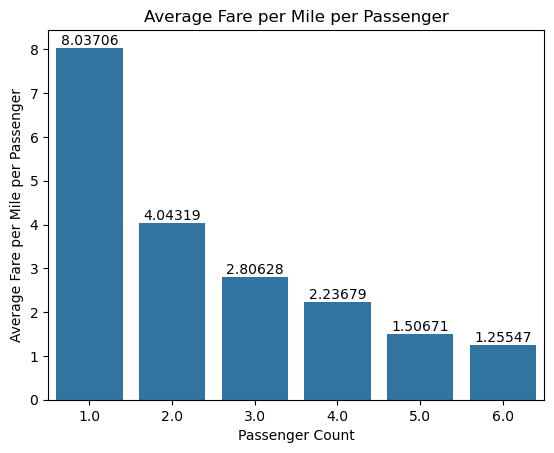

In [48]:
# Analyse the fare per mile per passenger for different passenger counts

sampled_taxi_records_filtered['fare_per_mile'] = sampled_taxi_records_filtered['fare_amount'] / sampled_taxi_records_filtered['trip_distance'].replace(0, np.nan)
sampled_taxi_records_filtered['fare_per_mile_per_passenger'] = sampled_taxi_records_filtered['fare_per_mile'] / sampled_taxi_records_filtered['passenger_count']
avg_fare_per_mile_per_passenger = sampled_taxi_records_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()


ax = sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=avg_fare_per_mile_per_passenger)
ax.bar_label(ax.containers[0])
ax.set_title('Average Fare per Mile per Passenger')
ax.set_xlabel('Passenger Count')
ax.set_ylabel('Average Fare per Mile per Passenger')
plt.show()

#Analysis : # This plot shows that the fare per mile per passenger is higher for trips with 1 passenger.

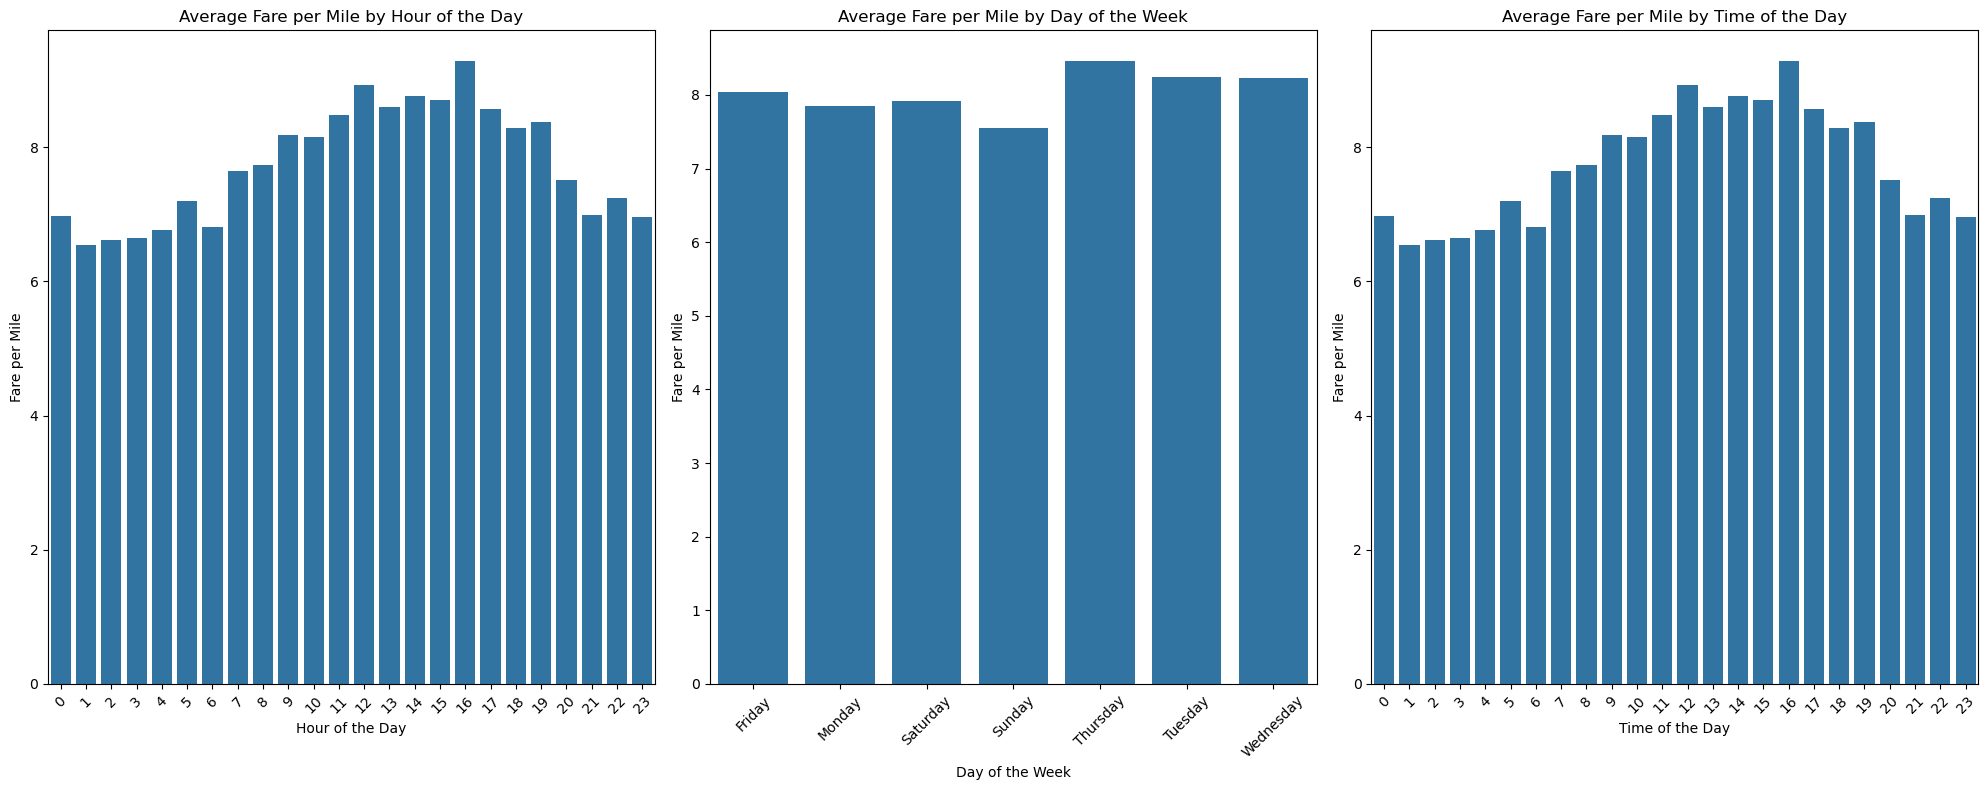

In [49]:
# Find the average fare per mile by hours of the day and by days of the week
# Compare the average fare per mile for different days and for different times of the day

#adding pickup time of the day:
sampled_taxi_records_filtered['pickup_time_of_day'] = sampled_taxi_records_filtered['tpep_pickup_datetime'].dt.hour


plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.barplot(x='pickup_hour', y='fare_per_mile', data=sampled_taxi_records_filtered.groupby('pickup_hour')['fare_per_mile'].mean().reset_index())
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.xticks(rotation=45)
plt.ylabel('Fare per Mile')

plt.subplot(1, 3, 2)
sns.barplot(x='pickup_day_of_week', y='fare_per_mile', data=sampled_taxi_records_filtered.groupby('pickup_day_of_week')['fare_per_mile'].mean().reset_index())
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Fare per Mile')

plt.subplot(1, 3, 3)
sns.barplot(x='pickup_time_of_day', y='fare_per_mile', data=sampled_taxi_records_filtered.groupby('pickup_time_of_day')['fare_per_mile'].mean().reset_index())
plt.title('Average Fare per Mile by Time of the Day')
plt.xlabel('Time of the Day')
plt.xticks(rotation=45)
plt.ylabel('Fare per Mile')

plt.tight_layout()
plt.show()

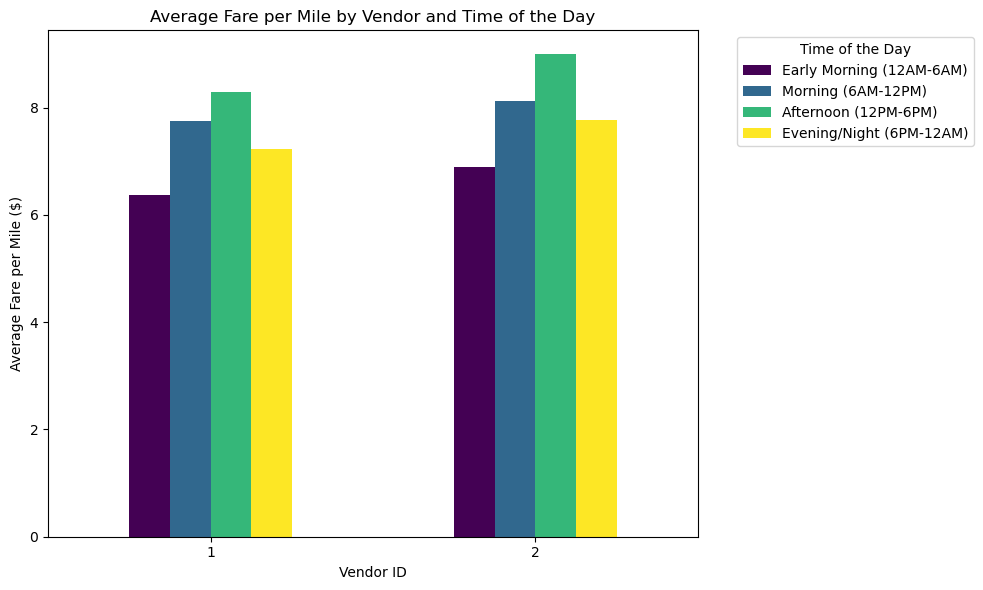

In [50]:
#Analyse the average fare per mile for the different vendors for different hours of the day

# Compare fare per mile for different vendors


#Grouping into bins for better analysis:
bins = [0, 6, 12, 18, 24]
labels = ['Early Morning (12AM-6AM)', 'Morning (6AM-12PM)', 'Afternoon (12PM-6PM)', 'Evening/Night (6PM-12AM)']

# Adding new columns to filter based on hour of day:
sampled_taxi_records_filtered['hour_group'] = pd.cut(sampled_taxi_records_filtered['pickup_hour'], bins=bins, labels=labels, right=False)

# Using Pivot table with grouped hours to calculate vendor fare per mile
vendor_fare_per_mile = pd.pivot_table(sampled_taxi_records_filtered, values='fare_per_mile', index='VendorID', columns='hour_group', aggfunc='mean')

# Plotting via bar to analyze :
vendor_fare_per_mile.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Fare per Mile by Vendor and Time of the Day')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=0)
plt.legend(title='Time of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


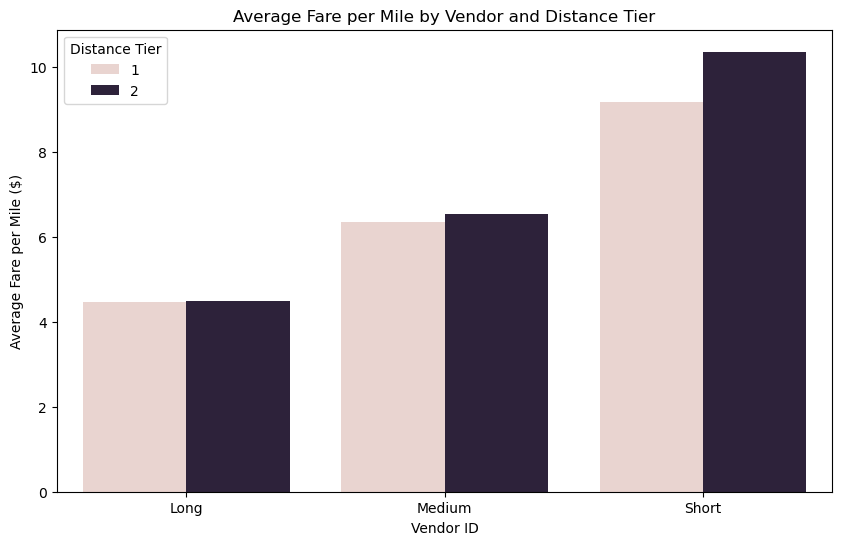

In [51]:
# Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.
# Defining distance tiers

#defining the distance_tier function:
def distance_tier(distance):
  if distance <= 2:
    return 'Short'
  elif distance <= 5:
    return 'Medium'
  else:
    return 'Long'

sampled_taxi_records_filtered['distance_tier'] = sampled_taxi_records_filtered['trip_distance'].apply(distance_tier)
tiered_fare_per_mile = sampled_taxi_records_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=tiered_fare_per_mile)
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.legend(title='Distance Tier')
plt.show()

## Customer Experience and Other Factors

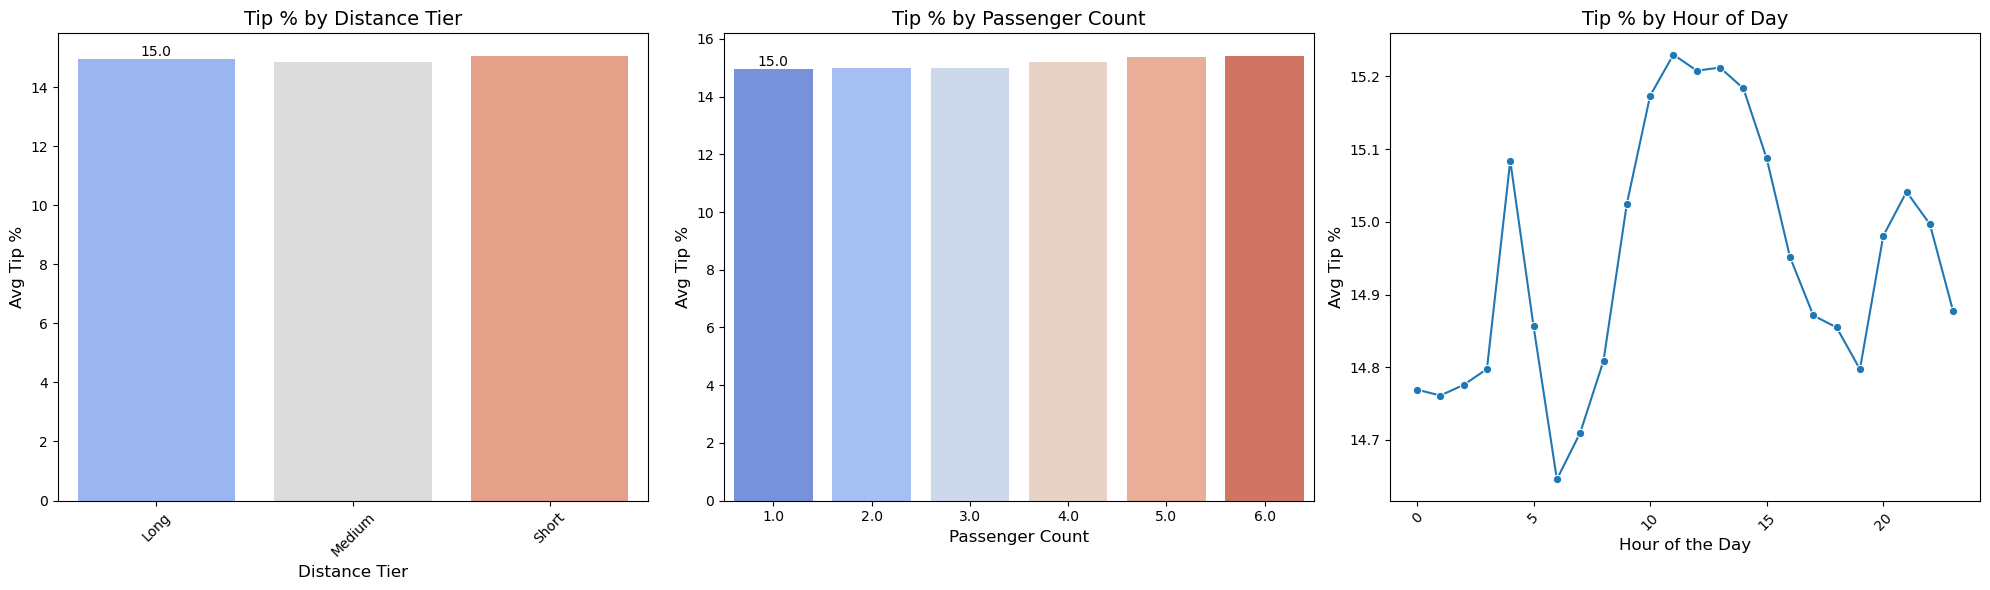

In [53]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Ensure tip percentage calculation
sampled_taxi_records_filtered['tip_percentage'] = (sampled_taxi_records_filtered['tip_amount'] / sampled_taxi_records_filtered['total_amount']) * 100

# Create hourly bins instead of using raw time values
sampled_taxi_records_filtered['pickup_hour'] = sampled_taxi_records_filtered['tpep_pickup_datetime'].dt.hour

# Grouping data
distance_tip_percentage = sampled_taxi_records_filtered.groupby('distance_tier')['tip_percentage'].mean().reset_index()
passenger_tip_percentage = sampled_taxi_records_filtered.groupby('passenger_count')['tip_percentage'].mean().reset_index()
time_tip_percentage = sampled_taxi_records_filtered.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Plot setup
plt.figure(figsize=(20, 6))

# Distance-based tip percentage
plt.subplot(1, 3, 1)
ax = sns.barplot(x='distance_tier', y='tip_percentage', data=distance_tip_percentage, palette='coolwarm')
plt.title('Tip % by Distance Tier', fontsize=14)
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=10)
plt.xlabel('Distance Tier', fontsize=12)
plt.ylabel('Avg Tip %', fontsize=12)
plt.xticks(rotation=45)

# Passenger count-based tip percentage
plt.subplot(1, 3, 2)
ax = sns.barplot(x='passenger_count', y='tip_percentage', data=passenger_tip_percentage, palette='coolwarm')
plt.title('Tip % by Passenger Count', fontsize=14)
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=10)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Avg Tip %', fontsize=12)
plt.xticks(rotation=0)

# Time of day-based tip percentage
plt.subplot(1, 3, 3)
ax = sns.lineplot(x='pickup_hour', y='tip_percentage', data=time_tip_percentage, palette='coolwarm', marker='o')
plt.title('Tip % by Hour of Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Avg Tip %', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

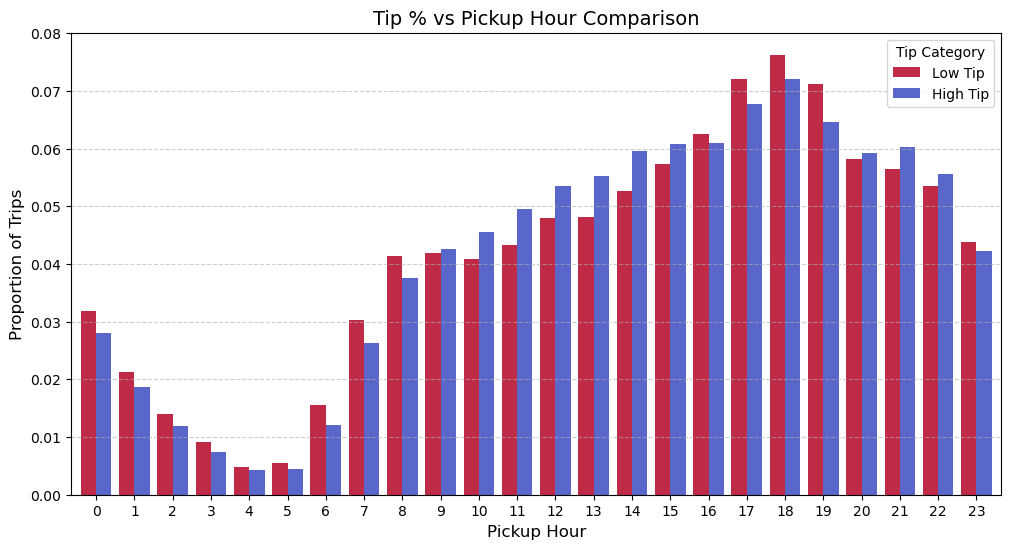

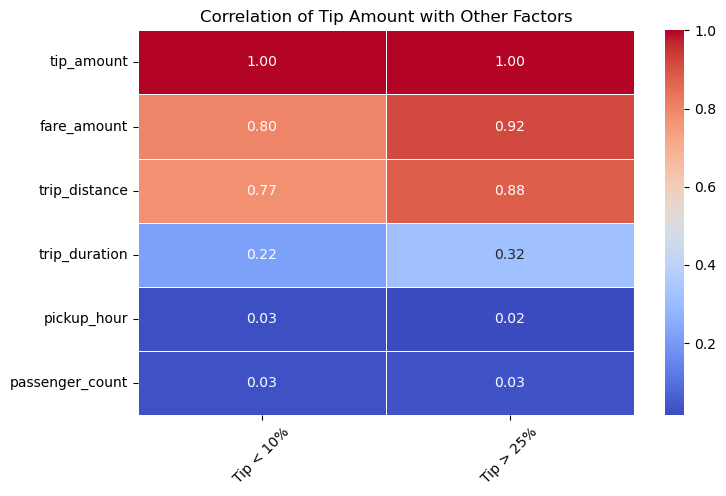

In [54]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Categorize tips as 'High Tip' (>10%) or 'Low Tip' (≤10%)
sampled_taxi_records_filtered['tip_category'] = sampled_taxi_records_filtered['tip_percentage'].apply(
    lambda x: 'High Tip' if x > 10 else 'Low Tip'
)

# Split data into High Tip and Low Tip groups
low_tip_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['tip_category'] == 'Low Tip']
high_tip_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['tip_category'] == 'High Tip']

# Analyze trip distance
distance_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['trip_distance'].describe(),
    'High Tip': high_tip_trips['trip_distance'].describe()
})

# Analyze passenger count
passenger_count_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['passenger_count'].describe(),
    'High Tip': high_tip_trips['passenger_count'].describe()
})

# Analyze pickup hour distribution (normalized to %)
pickup_time_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['pickup_hour'].value_counts(normalize=True).sort_index(),
    'High Tip': high_tip_trips['pickup_hour'].value_counts(normalize=True).sort_index()
}).fillna(0)  # Fill missing hours with 0

# Analyze fare amount
fare_amount_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['fare_amount'].describe(),
    'High Tip': high_tip_trips['fare_amount'].describe()
})

#Select only relevant columns for correlation
columns_to_analyze = ['tip_amount', 'fare_amount', 'trip_distance', 'trip_duration', 'pickup_hour', 'passenger_count']

#Compute correlation of tip percentage with other variables
low_tip_corr = low_tip_trips[columns_to_analyze].corrwith(low_tip_trips['tip_amount']).to_frame(name="Tip < 10%")
high_tip_corr = high_tip_trips[columns_to_analyze].corrwith(high_tip_trips['tip_amount']).to_frame(name="Tip > 25%")

#Concatenate both correlation dataframes
corr_data = pd.concat([low_tip_corr, high_tip_corr], axis=1)


#  Visualizing Tip % vs. Pickup Hour
plt.figure(figsize=(10, 5))
pickup_time_comparison.plot(kind='bar', width=0.8, figsize=(12, 6), colormap='coolwarm_r', alpha=0.85)
plt.title('Tip % vs Pickup Hour Comparison', fontsize=14)
plt.xlabel('Pickup Hour', fontsize=12)
plt.ylabel('Proportion of Trips', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Tip Category")
plt.show()


#Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Tip Amount with Other Factors")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



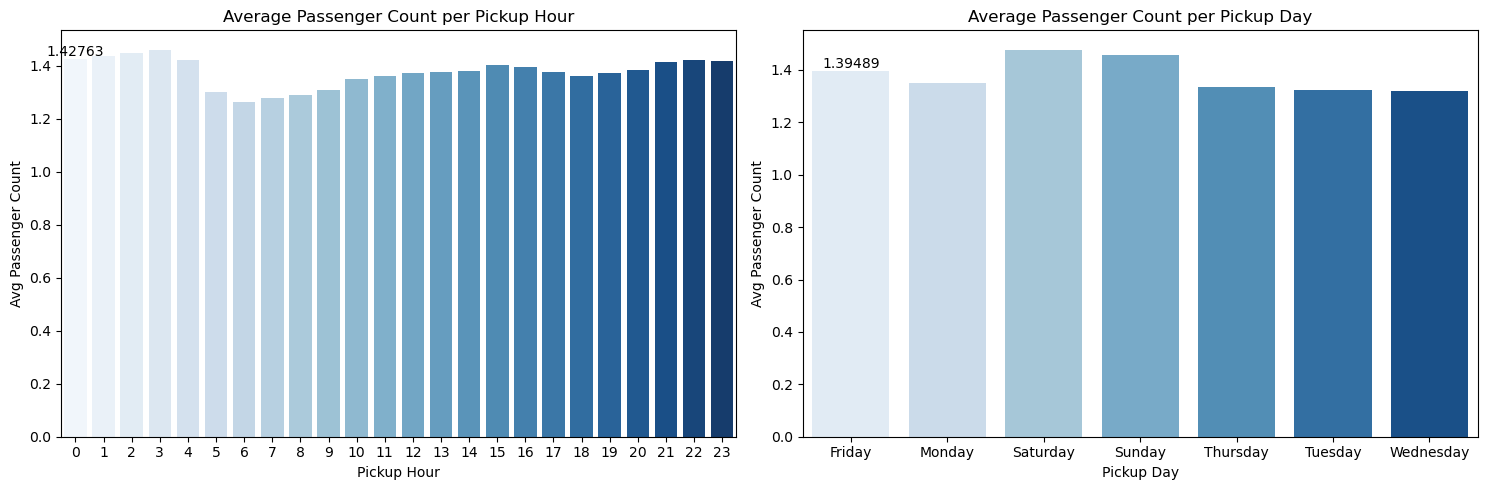

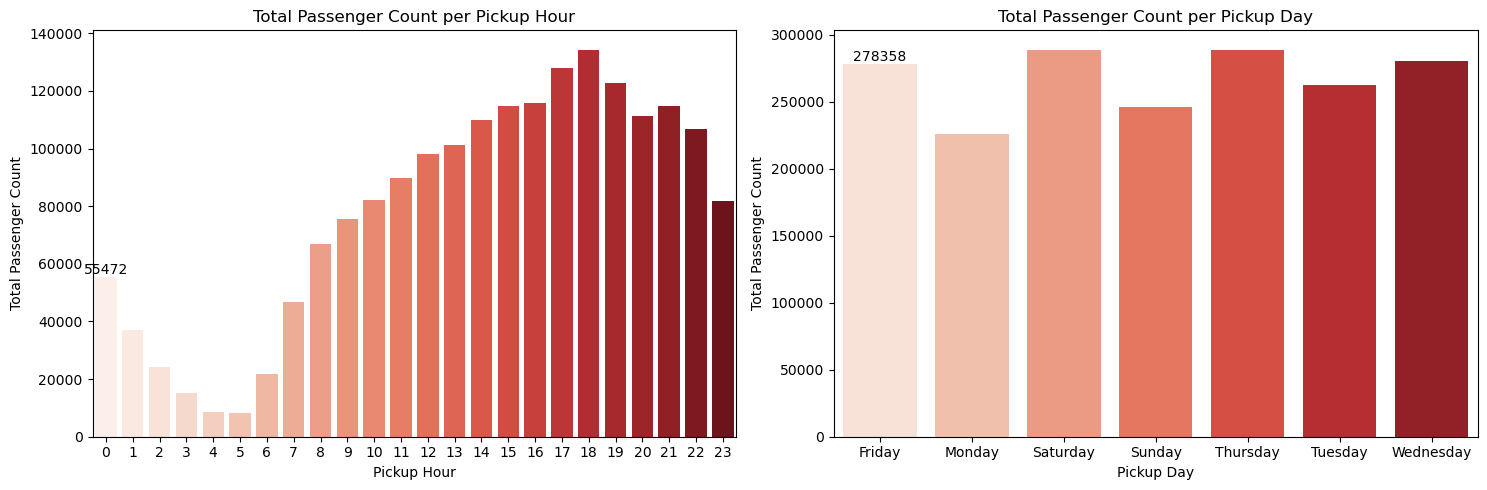

In [55]:
#Analyse the variation of passenger count across hours and days of the week
# See how passenger count varies across hours and days

# Creating subplots for average passenger count analysis
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

#Average Passenger Count by Hour
ax1.set_title('Average Passenger Count per Pickup Hour')
avg_passenger_hour = sampled_taxi_records_filtered.groupby(['pickup_hour'])['passenger_count'].mean()
sns.barplot(x=avg_passenger_hour.index, y=avg_passenger_hour.values, ax=ax1, palette='Blues')
ax1.set_xlabel('Pickup Hour')
ax1.set_ylabel('Avg Passenger Count')
ax1.bar_label(ax1.containers[0])

#Average Passenger Count by Day
ax2.set_title('Average Passenger Count per Pickup Day')
avg_passenger_day = sampled_taxi_records_filtered.groupby(['pickup_day'])['passenger_count'].mean()
sns.barplot(x=avg_passenger_day.index, y=avg_passenger_day.values, ax=ax2, palette='Blues')
ax2.set_xlabel('Pickup Day')
ax2.set_ylabel('Avg Passenger Count')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()
plt.show()


# Creating subplots for total passenger count analysis
fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(15, 5))

#Total Passenger Count by Hour
ax3.set_title('Total Passenger Count per Pickup Hour')
total_passenger_hour = sampled_taxi_records_filtered.groupby(['pickup_hour'])['passenger_count'].sum()
sns.barplot(x=total_passenger_hour.index, y=total_passenger_hour.values, ax=ax3, palette='Reds')
ax3.set_xlabel('Pickup Hour')
ax3.set_ylabel('Total Passenger Count')
ax3.bar_label(ax3.containers[0])

#Total Passenger Count by Day
ax4.set_title('Total Passenger Count per Pickup Day')
total_passenger_day = sampled_taxi_records_filtered.groupby(['pickup_day'])['passenger_count'].sum()
sns.barplot(x=total_passenger_day.index, y=total_passenger_day.values, ax=ax4, palette='Reds')
ax4.set_xlabel('Pickup Day')
ax4.set_ylabel('Total Passenger Count')
ax4.bar_label(ax4.containers[0])

plt.tight_layout()
plt.show()


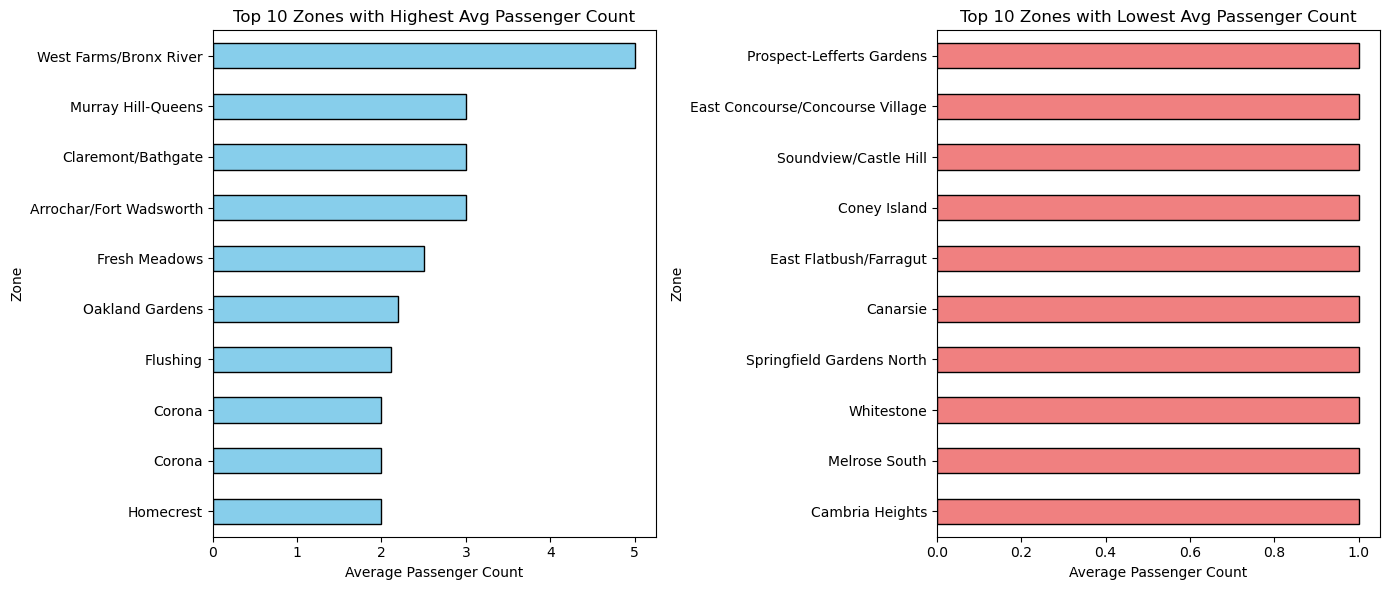

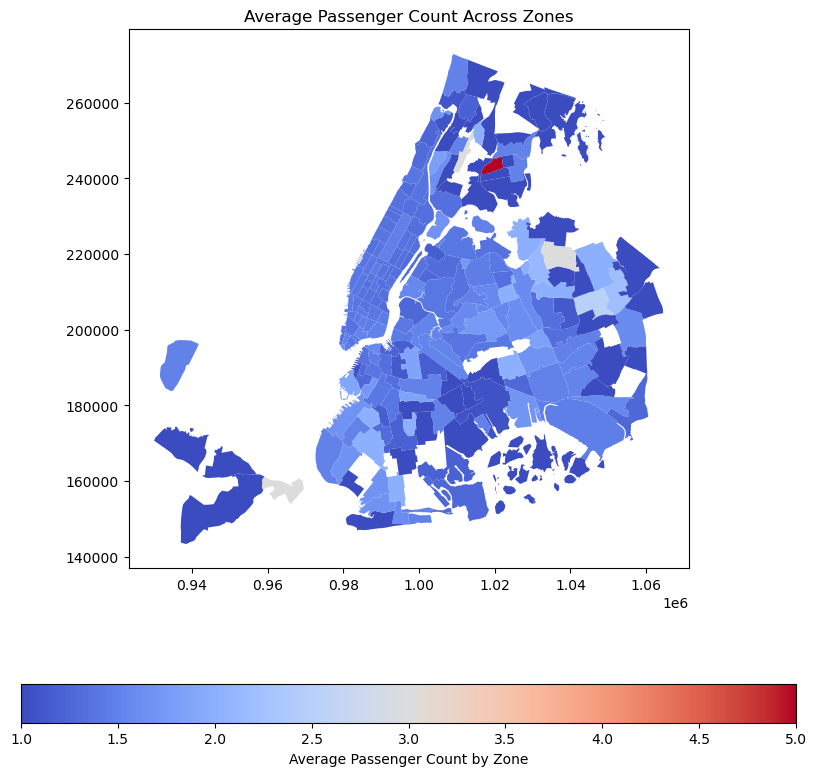

In [56]:
# How does passenger count vary across zones


# My Comment : Filter out rows where 'passenger_count' is NaN or 0
filtered_zones = sampled_taxi_records_filtered[sampled_taxi_records_filtered['passenger_count'].notna() &
                                               (sampled_taxi_records_filtered['passenger_count'] > 0)]

# My Comment : Add/Replace the column in zones DataFrame
zones['avg_passenger_count'] = zones['zone'].map(
    filtered_zones.groupby('pickup_zone')['passenger_count'].mean()
)

# My Comment : Get the top 10 highest and lowest zones by avg passenger count
top_10_highest = zones[['zone', 'avg_passenger_count']].nlargest(10, 'avg_passenger_count').set_index('zone')
top_10_lowest = zones[['zone', 'avg_passenger_count']].nsmallest(10, 'avg_passenger_count').set_index('zone')

# My Comment : Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# My Comment : Plot top 10 highest zones
top_10_highest['avg_passenger_count'].plot(kind='barh', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Average Passenger Count')
axes[0].set_ylabel('Zone')
axes[0].set_title('Top 10 Zones with Highest Avg Passenger Count')
axes[0].invert_yaxis()  # Invert y-axis so highest values are on top

# My Comment : Plot top 10 lowest zones
top_10_lowest['avg_passenger_count'].plot(kind='barh', color='lightcoral', edgecolor='black', ax=axes[1])
axes[1].set_xlabel('Average Passenger Count')
axes[1].set_ylabel('Zone')
axes[1].set_title('Top 10 Zones with Lowest Avg Passenger Count')
axes[1].invert_yaxis()  # Invert y-axis so lowest values are on top

plt.tight_layout()
plt.show()

# My Comment : Plot the zones with average passenger count (optional: you can adjust color scale)
fig, ax = plt.subplots(figsize=(10, 10))
zones.plot(column='avg_passenger_count', ax=ax, legend=True,
           legend_kwds={'label': "Average Passenger Count by Zone", 'orientation': "horizontal"},
           cmap='coolwarm')

plt.title('Average Passenger Count Across Zones')
plt.show()


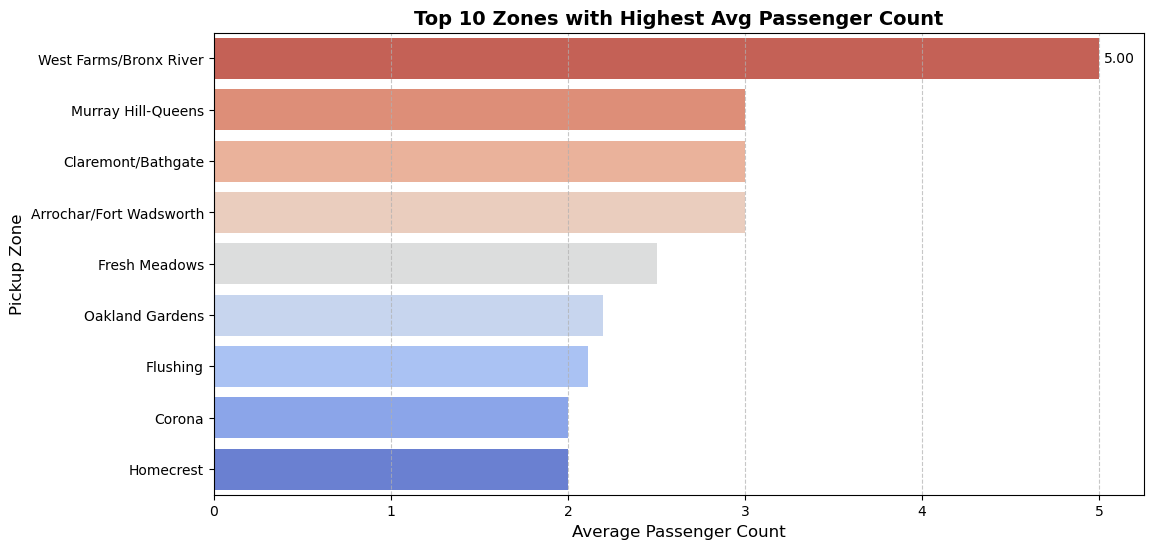

In [57]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

#Compute total passenger counts and number of trips per pickup zone
pickup_zone_passenger_counts = sampled_taxi_records_filtered.groupby('pickup_zone').agg(
    passenger_count=('passenger_count', 'sum'),
    Number_of_trips=('pickup_zone', 'count')  # Count the number of trips
).reset_index()

#Merge the computed data with zones dataset
zones_with_trips = zones.merge(pickup_zone_passenger_counts, left_on='zone', right_on='pickup_zone', how='left')

#Calculate the average passenger count per trip
zones_with_trips['average_passenger_count'] = zones_with_trips['passenger_count'] / zones_with_trips['Number_of_trips']

#Select the top 10 zones with the highest average passenger count
top_10_zones = zones_with_trips.nlargest(10, 'average_passenger_count')

#Plot the Top 10 Zones by Avg Passenger Count
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='average_passenger_count', y='zone', data=top_10_zones, palette='coolwarm_r')

#Annotate bars with values
ax.bar_label(ax.containers[0], fmt="%.2f", padding=3)

plt.xlabel("Average Passenger Count", fontsize=12)
plt.ylabel("Pickup Zone", fontsize=12)
plt.title("Top 10 Zones with Highest Avg Passenger Count", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



In [58]:
# Analyse the pickup/dropoff zones or times when extra charges are applied more frequently
surcharge_columns = ["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "airport_fee"]
sampled_taxi_records_filtered[surcharge_columns]

,extra,mta_tax,improvement_surcharge,congestion_surcharge,airport_fee
0,1.0,0.5,1.0,2.5,0.00
1,3.5,0.5,1.0,2.5,0.00
2,1.0,0.5,1.0,2.5,0.00
3,1.0,0.5,1.0,2.5,0.00
4,1.0,0.5,1.0,0.0,1.25
...,...,...,...,...,...
1421191,1.0,0.5,1.0,2.5,0.00
1421192,2.5,0.5,1.0,2.5,0.00
1421194,3.5,0.5,1.0,2.5,0.00
1421195,1.0,0.5,1.0,2.5,0.00


Percentage of trips with each surcharge applied:
improvement_surcharge    100.00
mta_tax                   99.45
congestion_surcharge      95.09
extra                     63.81
airport_fee                8.50
dtype: float64


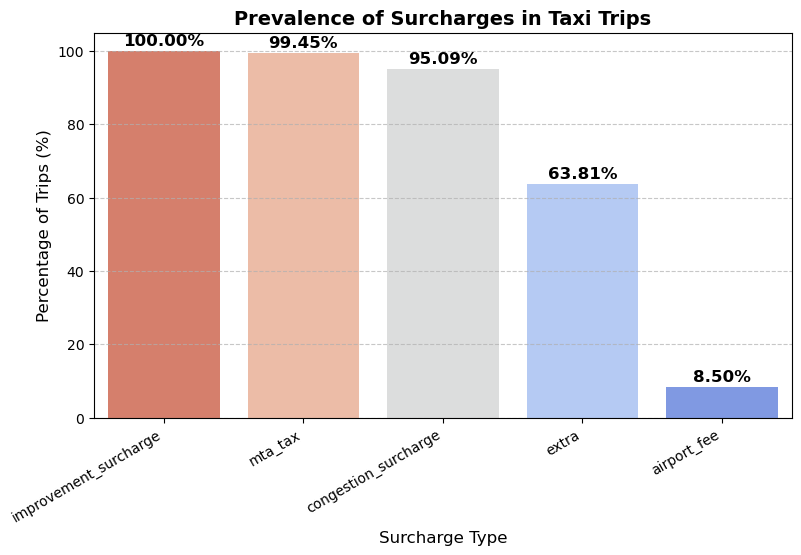

In [59]:
# How often is each surcharge applied?

#Define surcharge columns to analyze
surcharge_columns = ["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "airport_fee"]

#Calculate percentage of trips with each surcharge applied
surcharge_counts = (sampled_taxi_records_filtered[surcharge_columns] > 0 ).sum()  # Count non-zero values
surcharge_percent = (surcharge_counts / len(sampled_taxi_records_filtered)) * 100  # Convert to percentage

#Sort values in descending order for better visualization
surcharge_percent = surcharge_percent.sort_values(ascending=False).round(2)

#Display the percentages
print("Percentage of trips with each surcharge applied:")
print(surcharge_percent)

#Plot the Top 5 most prevalent surcharges
plt.figure(figsize=(9, 5))  # Increase figure width for better spacing
sns.barplot(x=surcharge_percent.index, y=surcharge_percent.values, palette="coolwarm_r")

plt.xlabel("Surcharge Type", fontsize=12)
plt.ylabel("Percentage of Trips (%)", fontsize=12)
plt.title("Prevalence of Surcharges in Taxi Trips", fontsize=14, fontweight="bold")
plt.ylim(0, surcharge_percent.max() + 5)  # Dynamic y-limit for better label spacing

#Show percentage values on bars with improved placement
for i, v in enumerate(surcharge_percent.values):
    plt.text(i, v + 1.5, f"{v:.2f}%", ha="center", fontsize=12, fontweight="bold", color='black')

plt.xticks(rotation=30, ha="right")  # Rotate labels for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

#how the plot
plt.show()


# Final Insights and Recommendations

# Strategic Recommendations for Improving Taxi Operations

### 1. Peak-Hour Fleet Allocation
- **Objective:** Increase taxi availability in high-demand areas during peak hours.
- **Strategy:** Deploy additional taxis to Midtown, JFK, and entertainment districts.
- **Implementation:**
    - Weekdays: 5 PM - 7 PM
    - Weekends: 10 PM - 3 AM

### 2. Dynamic Routing & Real-Time Traffic Integration
- **Objective:** Minimize passenger wait times and optimize travel efficiency.
- **Strategy:** Use real-time traffic data to guide taxis away from congested routes.
- **Implementation:**
    - Reroute taxis to avoid slow-moving areas identified in analysis.

### 3. Geofencing & Incentives for Balanced Distribution
- **Objective:** Ensure an equitable distribution of taxis across all zones.
- **Strategy:** Use geofencing to manage supply and demand.
- **Implementation:**
    - **High-Demand Zones:** Implement priority dispatching and dynamic pricing.
    - **Low-Demand Zones:** Offer incentives such as bonuses or discounts for drivers.

### 4. Reducing Empty Trips & Idle Time
- **Objective:** Increase operational efficiency and driver revenue.
- **Strategy:** Optimize the matching of drop-offs and pickups.
- **Implementation:**
    - **Airports (JFK & LaGuardia):** Match incoming taxis with outgoing passengers.
    - **High-Traffic Areas (e.g., Times Square):** Improve allocation to address the imbalance where drop-offs exceed pickups.

### 5. Enhancing Customer Experience & Service Quality
- **Objective:** Improve customer satisfaction and revenue.
- **Strategy:** Align taxi deployment and driver incentives with customer behavior.
- **Implementation:**
    - Deploy more taxis to zones with historically high tip percentages.
    - Encourage drivers to balance short and long trips to optimize revenue.
    - Offer fare discounts during off-peak hours to maintain

# Strategic Cab Positioning for Enhanced Efficiency

### Time-Based Fleet Positioning

Based on trip trends, here's how to position cabs throughout the day:

- **Weekday Mornings (7 AM - 10 AM):**
  - **Focus:** Residential areas like Brooklyn and Queens to serve commuters.
  - **Action:** Position taxis near major subway and train stations for crucial "last-mile" service.

- **Evening Rush (3 PM - 7 PM):**
  - **Focus:** Business districts, Midtown, and the Financial District.
  - **Action:** Increase cab presence at major transit hubs such as JFK, LaGuardia, and Penn Station to handle both commuter and airport traffic.

- **Late Night (10 PM - 3 AM):**
  - **Focus:** Nightlife hotspots including Times Square, the Lower East Side, and Williamsburg.
  - **Action:** Ensure comprehensive coverage around airports and major hotels for late-night travelers.

---

### Weekday vs. Weekend Optimization

- **Weekdays:** Prioritize business-centric areas like Midtown and Downtown.
- ****Weekends:** Shift the primary focus to entertainment, nightlife, and shopping districts.
- **Sunday Nights:** Increase taxi availability at airports and transit hubs to accommodate returning travelers.

---

### Seasonal & Event-Based Planning

- **Summer (May - August):**
  - **Focus:** Tourist hotspots like Central Park, Coney Island, and Rockaway Beach.

# Data-Driven Pricing Strategy for Maximized Revenue and Competitiveness

## 1. Customer Segmentation and Tiered Pricing

- **Analyze Customer Data:** Use purchase history and usage patterns to understand different customer groups.
- **Tiered Pricing:**
    - **Premium Riders:** Higher fares for priority access and luxury vehicle options.
    - **Frequent Riders:** Loyalty programs and discounts to encourage repeat business.
    - **Price-Sensitive Riders:** Offer off-peak discounts to boost ridership.

## 2. Dynamic Pricing Adjustments

- **Real-Time Demand Analysis:** Adjust pricing in real time based on demand from the time of day, seasonality, and special events.
- **Peak-Hour Pricing (5 PM - 7 PM & 11 PM - 5 AM):** Increase base fares and per-mile rates to capitalize on high-demand periods.
- **Off-Peak Discounts (10 AM - 3 PM, Weekdays):** Lower fares to improve fleet utilization during slower periods.

## 3. Distance-Based Pricing Strategy

- **Short Trips (≤ 2 miles):** Maintain competitive fares and offer promotions to attract customers.
- **Medium Trips (2-5 miles):** Implement a slight fare increase while keeping the price affordable.
- **Long Trips (> 5 miles):** Use a tiered pricing model to maximize revenue and stay competitive with other transportation options.

## 4. Competitive Price Monitoring

- **Price Intelligence Tools:** Use software to track competitor pricing and adjust fares accordingly.
- **Surge Pricing During Competitor Spikes:** Dynamically adjust your rates to capture demand when competitors increase their fares.

## 5. Surge Pricing for High-Demand Locations & Time Periods

- **Time-Based Surge Pricing:**
    - Increase fares during **rush hours** and in **nightlife zones** like Midtown and Times Square.
    - Adjust fares for **weekend events, concerts, and festivals**.
- **Zone-Based Surge Pricing:** Implement dynamic multipliers in specific areas where demand consistently exceeds supply.

## 6. Cost-Based Adjustments & Margin Optimization

- **Regular Margin Analysis:** Periodically review operational costs like fuel and maintenance and adjust fares to maintain a healthy margin.
- **Cost-Adjusted Pricing Model:** If costs rise, update the fare structure while ensuring that rates remain competitive.

## 7. Incentives for Airport Trips

- **Flat-Rate Pricing:**
    - **JFK to Manhattan:** $55
    - **LaGuardia to Manhattan:** $40
- **Discounted Return Trips:** Encourage round-trip bookings by offering a discount on the return journey.

## 8. Passenger Count & Fare Adjustments

- **Group Ride Incentives:** Offer lower per-passenger rates for shared rides and flat pricing for groups of three or more to increase occupancy.
- **Suggested Tip Amounts:** Implement preset tipping suggestions in the digital payment system to help boost driver earnings.

## 9. Customer Retention & Incentive Programs

- **Loyalty & Subscription Plans:**
    - **Monthly ride passes** with discounted fares.
    - **Corporate premium packages** with priority service.
- **Referral & Rewards-Based Discounts:** Encourage new customer acquisition with ride discounts for referrals.
- **Special Promotions:** Offer discounts in underutilized zones to stimulate demand and balance the fleet.